In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import optimize
from scipy.ndimage import zoom

In [2]:
img = np.load('./NORMALIZED-RP-STACK.npy')

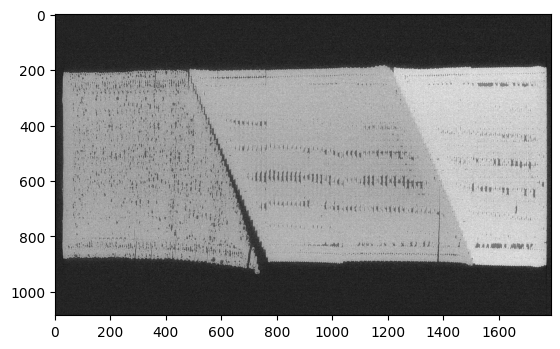

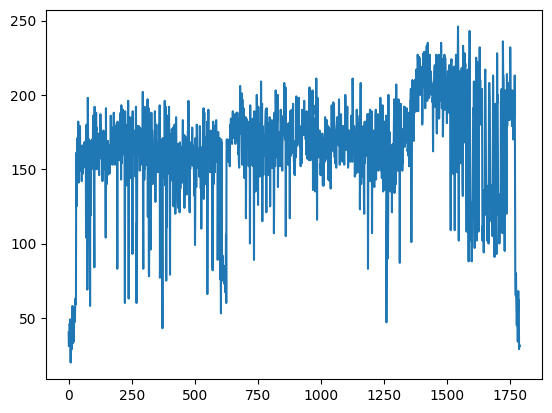

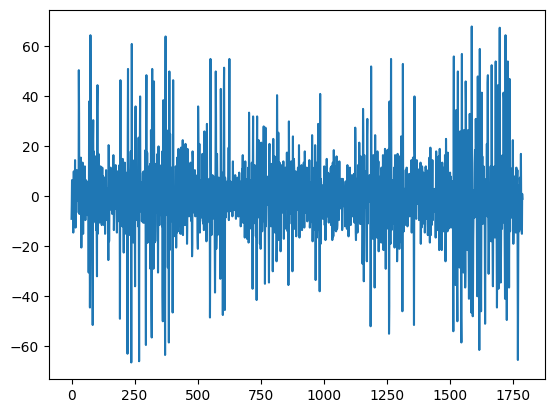

In [18]:
layer = 900
mat = img[543,layer,:]
diffmat = np.gradient(mat)

plt.imshow(img[:,layer,:], cmap='gray')
plt.show()
plt.plot(mat)
plt.show()

plt.plot(diffmat)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


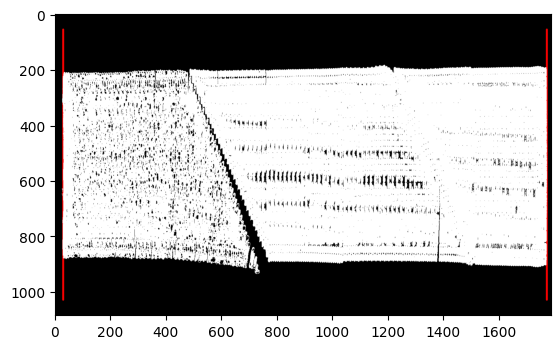

In [19]:
for left in range(1789):
    if diffmat[left] > 40:
        break

lines = np.zeros((1085, 1789, 3), dtype=np.uint8)
lines = cv.line(lines, (left, 55), (left, 1030), (255,0,0), 5)

for right in reversed(range(1789)):
    if diffmat[right] < -40:
        break

lines = cv.line(lines, (right, 55), (right, 1030), (255,0,0), 5)

plc = np.zeros([1085, 1789, 3])
plc[:,:,0] = img[:,layer,:]
plc[:,:,1] = img[:,layer,:]
plc[:,:,2] = img[:,layer,:]

ret, plc = cv.threshold(plc, 120, 255, cv.THRESH_BINARY)

plt.imshow(plc+lines)
plt.show()

In [20]:
lengths = []

for i in range(1085):
    mat = img[543,i,:]
    diffmat = np.gradient(mat)
    for left in range(1789):
        if diffmat[left] > 40:
            break
    for right in reversed(range(1789)):
        if diffmat[right] < -40:
            break
    lengths.append(right-left)

In [23]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

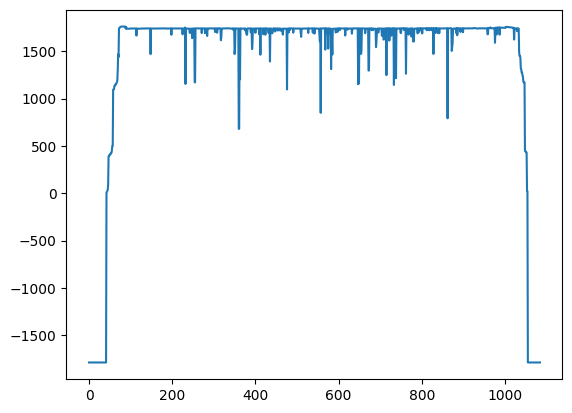

1739.0
1739.8362892223738


In [27]:
plt.plot(lengths)
plt.show()

print(np.median(lengths))

filtered = reject_outliers(np.asarray(lengths))

print(np.mean(filtered))